# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [1]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
# ... import here the different keras libraries you need

%matplotlib inline

Using TensorFlow backend.


## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# ...

X_train =  X_train.reshape(60000, 784) 
X_test =   X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test =  X_test.astype('float32')
X_train /= 255.0
X_test /=  255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [3]:
from keras.utils import to_categorical
n_classes = 10
Y_train = to_categorical(y_train, n_classes)# ...                  modify targets to 1-hot using np_utils.to_categorical()
Y_test = to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a Multi-Layer Perceptron in our case. We will train it using H neurons, through E epochs, using batches of size B. We can try with 300 neuros, 10 epochs and batches of 128 images. We will also need to tell Keras what is the size of our inputs, in our case a linearized vector of size D=784.

In [14]:
H = 300               # number of neurons
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(H, input_shape=(D,), activation='relu'))
model.add(Dense(n_classes, activation='relu'))
# ... define the model as a Sequential type
# ... add the hidden layer of type Dense with relu activation
# ... add the output layer of type Dense with sigmoid activation

# ... print model infomration with summary() method
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [15]:
E = 10                # number of epochs
B = 128               # batch size

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4946 - acc: 0.9285 - val_loss: 0.4087 - val_acc: 0.9248
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4095 - acc: 0.9188 - val_loss: 0.4198 - val_acc: 0.9211
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3889 - acc: 0.9158 - val_loss: 0.3852 - val_acc: 0.9111
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3778 - acc: 0.9128 - val_loss: 0.3823 - val_acc: 0.9090
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.3721 - acc: 0.9101 - val_loss: 0.3795 - val_acc: 0.9099
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3675 - acc: 0.9089 - val_loss: 0.3847 - val_acc: 0.9081
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss:

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

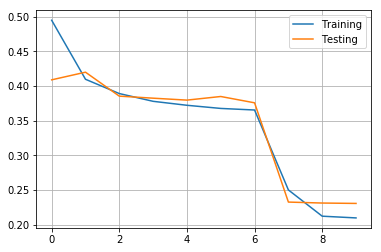

In [16]:
#print(log)
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [17]:
loss_test, metric_test = model.evaluate(X_test, Y_test)# ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 1s 71us/step
Test loss: 0.23058706866502762
Test accuracy: 0.9054799777984619


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [20]:
from sklearn.metrics import confusion_matrix
pred = model.predict_classes(X_test, verbose=1)
confusion_matrix(y_test, pred)

10000/10000 [==============================] - 1s 54us/step


array([[ 973,    0,    0,    0,    1,    0,    4,    1,    1,    0],
       [1111,    0,    1,    5,    2,    0,    8,    1,    7,    0],
       [  12,    0, 1000,    4,    3,    0,    2,    4,    7,    0],
       [  11,    0,    3,  987,    0,    1,    0,    3,    3,    2],
       [   3,    0,    2,    0,  968,    0,    4,    0,    2,    3],
       [  16,    0,    0,    9,    1,  851,    6,    2,    5,    2],
       [   6,    0,    0,    1,    3,    1,  947,    0,    0,    0],
       [  26,    0,   12,    2,    1,    0,    0,  980,    1,    6],
       [  14,    0,    0,    4,    6,    1,    3,    4,  938,    4],
       [  17,    0,    0,    6,   11,    0,    0,    5,    2,  968]])